In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [9]:
movies_data= pd.read_csv('Amazon - Movies and TV Ratings.csv')

In [10]:
movies_data.head(3)

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
movies_data.shape

(4848, 207)

In [12]:
movies_data.columns

Index(['user_id', 'Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6',
       'Movie7', 'Movie8', 'Movie9',
       ...
       'Movie197', 'Movie198', 'Movie199', 'Movie200', 'Movie201', 'Movie202',
       'Movie203', 'Movie204', 'Movie205', 'Movie206'],
      dtype='object', length=207)

In [23]:
# Which movies have maximum views/ratings?
p1 = movies_data.sum(axis = 0, skipna = True)
p1 = pd.DataFrame(p1)

p1 = p1[1:]
p1 =  p1.reset_index()
p1.columns = ["Movie","Rating"]
p1.sort_values(by=['Rating'],ascending=False).tail()


,Movie,Rating
153,Movie154,1
143,Movie144,1
68,Movie69,1
59,Movie60,1
66,Movie67,1


In [7]:
# What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
p2 = movies_data.mean(axis=0)
p2 = pd.DataFrame(p2)
p2 =  p2.reset_index()
p2.columns = ["Movie","Avg_Rating"]
p2

,Movie,Avg_Rating
0,Movie1,5.000000
1,Movie2,5.000000
2,Movie3,2.000000
3,Movie4,5.000000
4,Movie5,4.103448
5,Movie6,4.000000
6,Movie7,5.000000
7,Movie8,5.000000
8,Movie9,5.000000
9,Movie10,5.000000


In [21]:
#top 5 movies with the maximum ratings.
p2.sort_values(by=['Avg_Rating'],ascending=False)[0:6]

,Movie,Avg_Rating
0,Movie1,5.0
65,Movie66,5.0
75,Movie76,5.0
74,Movie75,5.0
73,Movie74,5.0
142,Movie143,5.0


In [27]:
df = movies_data.melt(id_vars=['user_id']).dropna()
df = df.rename(columns={"variable": "movie_id", "value": "Rating"})

In [29]:
n_users = df.user_id.unique().shape[0]
n_movies = df.movie_id.unique().shape[0]
print(n_users,n_movies)

4848 206


In [26]:
df['Rating'] = df['Rating'] - 3

In [30]:
# From sklearn import cosine
from sklearn.metrics.pairwise import cosine_similarity
dfUU = pd.pivot_table(df,values = 'Rating', index = 'user_id', columns='movie_id')
dfUU = dfUU.iloc[:,np.arange(dfUU.shape[1])[dfUU.isna().sum() < 4848]]
dfUU = dfUU.fillna(0)
cosineUU = cosine_similarity(dfUU)
np.fill_diagonal(cosineUU,0)
similarityUU = pd.DataFrame(cosineUU, index = dfUU.index)
similarityUU.columns= dfUU.index
print(similarityUU.shape)
similarityUU.head()


(4848, 4848)


user_id,A0047322388NOTO4N8SKD,A00473363TJ8YSZ3YAGG9,A1004AX2J2HXGL,A100CQXJ6D44T9,A100Z2S0880G9A,A1027BL79BSP5P,A102Z4PIK7CYD8,A10367AR7BPFG2,A103HNKB9YAN6P,A103KNDW8GN92L,...,AZNADO488RR7H,AZPCHLL1GHUXU,AZQLDLVVX9PE,AZR2EXV14JPHN,AZSL7FA9NWYX0,AZT7WWYF4YVJA,AZVER2EPLYDZ9,AZY4RYP9948K9,AZYJ9TS07B02W,AZZ1KF8RAO1BR
user_id,,,,,,,,,,,,,,,,,,,,,
A0047322388NOTO4N8SKD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00473363TJ8YSZ3YAGG9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
A1004AX2J2HXGL,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
A100CQXJ6D44T9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100Z2S0880G9A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([4.271e+03, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 6.000e+00, 0.000e+00, 5.690e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

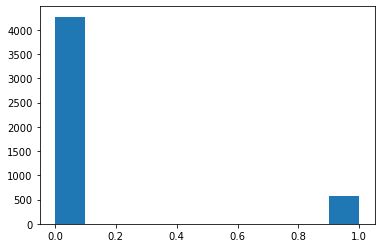

In [31]:
plt.hist(similarityUU.iloc[:,800])

In [32]:
## find 20 similarities to user 124
sim20 = similarityUU.iloc[:,124].sort_values(ascending = False)[:20]
sim20

user_id
A0047322388NOTO4N8SKD    1.0
A1J9DTV3OCUAHE           1.0
A2CZE2QSU865X7           1.0
ADZ44DAFDWCR1            1.0
ADWTQ6HDIK1OS            1.0
A38BCGQ1PYSZTG           1.0
ADM4LTCRRFOPB            1.0
ADJSESLAQWPJ9            1.0
A1J5LBGXXQOGHS           1.0
A1J683GO7M4YVE           1.0
ADCDU6PWUDBZ4            1.0
A1J6T08SXOYM3W           1.0
A1JBMCVO7RSXIL           1.0
A1GKK4HNE5N1BI           1.0
A2CEHLOIGAP79M           1.0
AD1ZL6IFUMERS            1.0
A2C7P5BX5F0FVK           1.0
A1JFTJMW1ADM2C           1.0
ACW3YK5CRPN3P            1.0
A38UIW4UG6WUR7           1.0
Name: A13BR35JUJUPW6, dtype: float64

In [33]:
## Movie Similarity

dfMM = pd.pivot_table(df,values = 'Rating', index = 'movie_id', columns='user_id')

In [34]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

In [35]:
reader = Reader()
data = Dataset.load_from_df(df.iloc[:,:3], reader = reader)
data

In [36]:
train, test = train_test_split(data, test_size=0.25)

In [37]:
recommender = SVD()
recommender.fit(train)
prediction = recommender.test(test)
accuracy.rmse(prediction)

RMSE: 1.1064


1.1064197434329242

In [38]:
test

[('A3DQ64ENZ91I4I', 'Movie140', 4.0),
 ('A29IT4Q0CBLDHK', 'Movie140', 5.0),
 ('A1BV3NHO9BOZVF', 'Movie16', 5.0),
 ('A1HHVJCCAQMLAM', 'Movie127', 5.0),
 ('A1OLAJZ1GTNGU4', 'Movie182', 5.0),
 ('A7BQF2Y5QBIC0', 'Movie92', 5.0),
 ('A3BIIQC3A935LS', 'Movie73', 2.0),
 ('A5Y15SAOMX6XA', 'Movie5', 2.0),
 ('A1NRCH7YAGZ07B', 'Movie127', 5.0),
 ('AP24ZN7PYDEBW', 'Movie127', 5.0),
 ('A5VHBZMPAH1PN', 'Movie127', 5.0),
 ('A3PZ88WU7RPTP6', 'Movie103', 5.0),
 ('A2EUFJ0KZP8GFH', 'Movie103', 5.0),
 ('A2SNUORW55MZWO', 'Movie127', 5.0),
 ('A2Y83LOXK1URXH', 'Movie92', 3.0),
 ('A3K40FNYGDPZEA', 'Movie196', 5.0),
 ('A3NFR606Q5II6P', 'Movie127', 1.0),
 ('A2KLT8PCDS4YZY', 'Movie127', 2.0),
 ('A3RBT7BQJ6KD31', 'Movie127', 5.0),
 ('A2YI3SU5THQUQZ', 'Movie127', 3.0),
 ('A3CM1CDUSWYDIO', 'Movie127', 5.0),
 ('A3R1L4KD35OT9U', 'Movie127', 5.0),
 ('A11M3AR1P782NU', 'Movie140', 4.0),
 ('A115MWRSSVKJQL', 'Movie140', 5.0),
 ('A2TWY3K3IUBMIM', 'Movie127', 5.0),
 ('A1GCIOKPZKFGWN', 'Movie127', 1.0),
 ('A11NR9PBWV4VA0', 'M